In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('loan_dataset.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

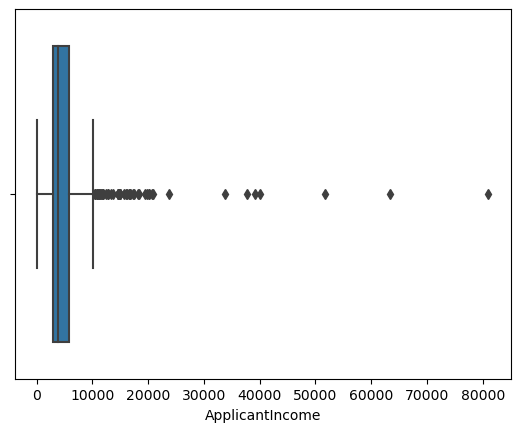

In [9]:
sns.boxplot(df.ApplicantIncome)

In [10]:
df.dropna(inplace=True)

In [11]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
df.shape

(480, 13)

In [14]:
df.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
df.replace({"Dependents":{'3+':4}},inplace=True)

In [16]:
df.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

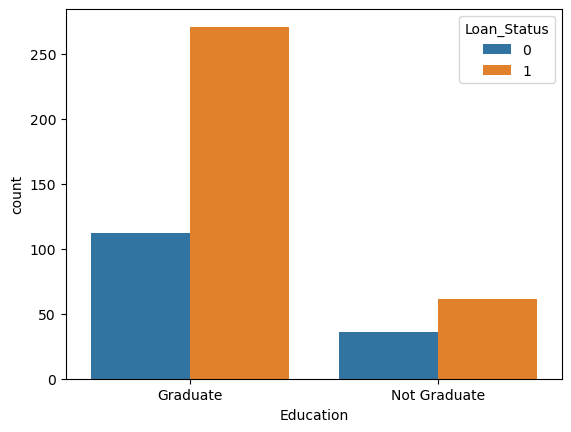

In [17]:
sns.countplot(x='Education',hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

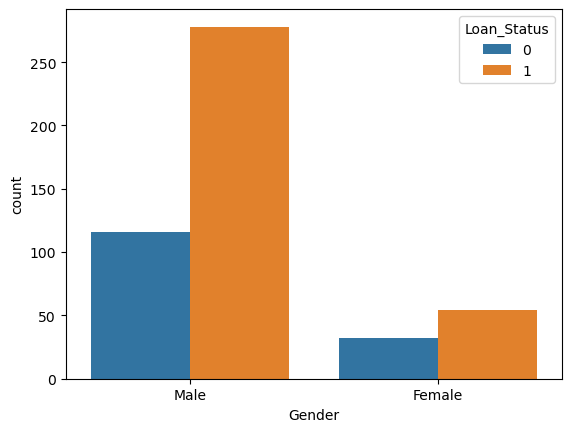

In [18]:
sns.countplot(x='Gender',hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

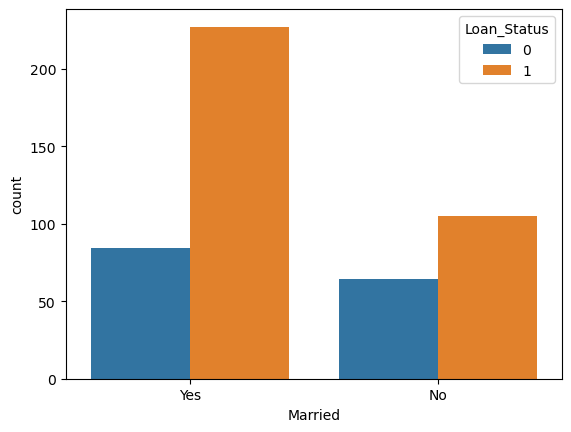

In [19]:
sns.countplot(x='Married',hue='Loan_Status', data=df)

In [20]:
df.replace({"Married":{'No':0,'Yes':1}},inplace=True)

In [21]:
df.replace({"Gender":{'Male':1,'Female':0}},inplace=True)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [23]:
df.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)

In [24]:
df.replace({"Education":{'Graduate':1,'Not Graduate':0}},inplace=True)

In [25]:
df.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [26]:
df.replace({"Property_Area":{'Semiurban':0,'Urban':2,'Rural':1}},inplace=True)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [28]:
df.Education.value_counts()

1    383
0     97
Name: Education, dtype: int64

In [29]:
df.replace({"Education": {1: 'Graduate', 0: 'Not Graduate'}}, inplace=True)


In [30]:
df.Education.value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
df.replace({"Education":{'Graduate':1,'Not Graduate':0}},inplace=True)

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [34]:
df.Education.value_counts()

1    383
0     97
Name: Education, dtype: int64

In [35]:
x=df.drop(df[['Loan_ID','Loan_Status']],axis=1)
y=df.Loan_Status

In [36]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=3)

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (384, 11) (96, 11)


In [39]:
classifier=svm.SVC(kernel='linear')

In [40]:
classifier.fit(x_train,y_train)


SVC(kernel='linear')

In [41]:
 x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score( y_train, x_train_prediction)

In [42]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7942708333333334


In [43]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score( y_test, x_test_prediction)

In [44]:
print('Accuracy score of the testing data : ', test_data_accuracy)

Accuracy score of the testing data :  0.8125


In [46]:

import gradio as gr

def predict_loan_status(Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area):
    # Encode the inputs
    Gender = 1 if Gender == 'Male' else 0
    Married = 1 if Married == 'Yes' else 0
    Education = 1 if Education == 'Graduate' else 0
    Self_Employed = 1 if Self_Employed == 'Yes' else 0
    Property_Area = 0 if Property_Area == 'Semiurban' else 2 if Property_Area == 'Urban' else 1
    Credit_History = int(Credit_History)

    # Arrange values into a matching data structure for your model
    input_data = [[Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]]
    prediction = classifier.predict(input_data)[0]

    # Transform the prediction back to its original form ('Y', 'N')
    return 'Y' if prediction == 1 else 'N'

iface = gr.Interface(
    fn=predict_loan_status,
    inputs=[
        gr.inputs.Radio(["Male", "Female"], label="Gender"),
        gr.inputs.Radio(['No', 'Yes'], label='Married'),
        gr.inputs.Number(label="Dependents"),
        gr.inputs.Radio(['Graduate', 'Not Graduate'], label="Education"),
        gr.inputs.Radio(['No', 'Yes'], label="Self_Employed"),
        gr.inputs.Number(label="ApplicantIncome"),
        gr.inputs.Number(label="CoapplicantIncome"),
        gr.inputs.Number(label="LoanAmount"),
        gr.inputs.Number(label="Loan_Amount_Term"),
        gr.inputs.Radio(['0', '1'], label="Credit_History"),
        gr.inputs.Radio(['Semiurban', 'Urban', 'Rural'], label="Property_Area"),
    ],
    outputs=gr.outputs.Textbox(label="Loan_Status")
)

iface.launch(share=True)



C:\Users\singh\AppData\Local\Temp\ipykernel_13892\3916608705.py:22: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Radio(["Male", "Female"], label="Gender"),
C:\Users\singh\AppData\Local\Temp\ipykernel_13892\3916608705.py:22: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Radio(["Male", "Female"], label="Gender"),
C:\Users\singh\AppData\Local\Temp\ipykernel_13892\3916608705.py:23: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Radio(['No', 'Yes'], label='Married'),
C:\Users\singh\AppData\Local\Temp\ipykernel_13892\3916608705.py:23: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Radio(['No', 'Yes'], label='Married'),
C:\Users\singh\AppData\Local\Temp\ip

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://2081154831eefc3ddc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
